In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_column',85)
pd.set_option('display.max_row',85)

In [ ]:
from google.colab import files

In [ ]:
upload=files.upload()

Saving CarPrice.csv to CarPrice.csv


In [ ]:
df=pd.read_csv('CarPrice.csv')

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df_dummy=pd.get_dummies(df)

In [ ]:
df_dummy

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_Nissan,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_maxda,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porcshce,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_toyouta,CarName_vokswagen,CarName_volkswagen,CarName_volvo,CarName_vw,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.CarName=df['CarName'].apply(lambda x: x.split(' ')[0])

In [ ]:
df.CarName

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
filt=df[df['symboling']==-1]

In [ ]:
filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 28 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            22 non-null     int64  
 1   symboling         22 non-null     int64  
 2   CarName           22 non-null     object 
 3   fueltype          22 non-null     object 
 4   aspiration        22 non-null     object 
 5   doornumber        22 non-null     object 
 6   carbody           22 non-null     object 
 7   drivewheel        22 non-null     object 
 8   enginelocation    22 non-null     object 
 9   wheelbase         22 non-null     float64
 10  carlength         22 non-null     float64
 11  carwidth          22 non-null     float64
 12  carheight         22 non-null     float64
 13  curbweight        22 non-null     int64  
 14  enginetype        22 non-null     object 
 15  cylindernumber    22 non-null     object 
 16  enginesize        22 non-null     int64  
 1

In [ ]:
x=df_dummy.drop('price',axis=1)
y=df_dummy.price

In [ ]:
# splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# building the model without normalizing the data

In [ ]:
x_train.shape

(164, 81)

In [ ]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

history=model.fit(x_train,y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 3ms/step - loss: 15057.2881 - mae: 15057.2881
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 14827.8643 - mae: 14827.8643
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 14601.6309 - mae: 14601.6309
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 14377.9600 - mae: 14377.9600
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 14156.4707 - mae: 14156.4707
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 13937.2520 - mae: 13937.2520
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 13718.0791 - mae: 13718.0791
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 13500.5781 - mae: 13500.5781
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 13282.1514 - mae: 13282.1514
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 13063.9639 - mae: 13063.9639

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 4964.1875 - mae: 4964.1875


[4964.1875, 4964.1875]

In [ ]:
y_train.median(),y_train.mean()

(10646.5, 13223.414634146342)

In [ ]:
def historys(hist,title):
  pd.DataFrame(hist.history).plot()
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title(f'{title}')
  plt.grid(True)

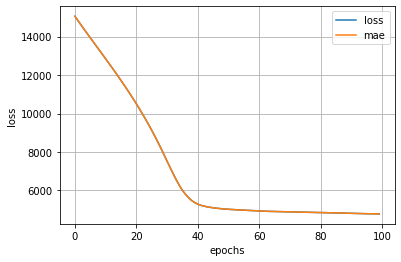

In [ ]:
historys(history)

In [ ]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

history_2=model_2.fit(x_train,y_train, epochs=200)

Epoch 1/200
6/6 [==============================] - 0s 3ms/step - loss: 15057.2881 - mae: 15057.2881
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 14827.8643 - mae: 14827.8643
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 14601.6309 - mae: 14601.6309
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 14377.9600 - mae: 14377.9600
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 14156.4707 - mae: 14156.4707
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 13937.2520 - mae: 13937.2520
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 13718.0791 - mae: 13718.0791
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 13500.5781 - mae: 13500.5781
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 13282.1514 - mae: 13282.1514
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 13063.9639 - mae: 13063.9639

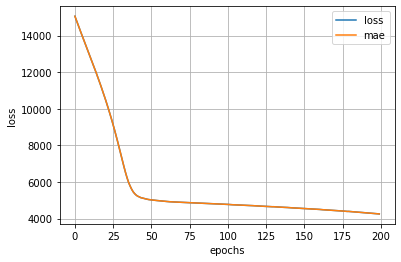

In [ ]:
pd.DataFrame(history_2.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(True)

In [ ]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

history_3=model_2.fit(x_train,y_train, epochs=200)

Epoch 1/200
6/6 [==============================] - 0s 5ms/step - loss: 4250.2134 - mae: 4250.2134
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 4243.7329 - mae: 4243.7329
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 4236.6987 - mae: 4236.6987
Epoch 4/200
6/6 [==============================] - 0s 7ms/step - loss: 4228.7798 - mae: 4228.7798
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 4220.7715 - mae: 4220.7715
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 4213.8057 - mae: 4213.8057
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 4206.2832 - mae: 4206.2832
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 4197.8218 - mae: 4197.8218
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 4196.5732 - mae: 4196.5732
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 4189.1509 - mae: 4189.1509
Epoch 11/200
6/6 [=

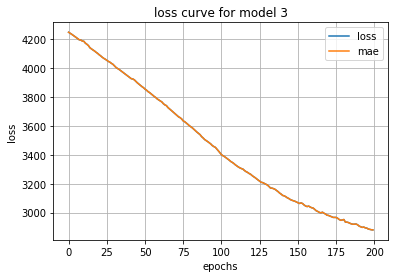

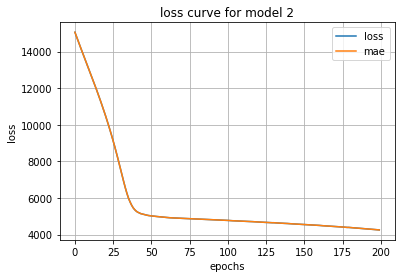

In [ ]:

historys(history_3,title='loss curve for model 3')

historys(history_2,title='loss curve for model 2')



In [ ]:
tf.random.set_seed(42)
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

history_4=model_4.fit(x_train,y_train, epochs=200,verbose=0)

In [ ]:
model_4.evaluate(x_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 2635.4893 - mae: 2635.4893


[2635.4892578125, 2635.4892578125]

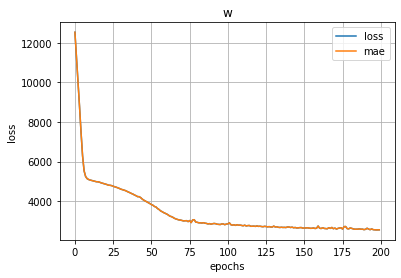

In [ ]:
historys(history_4,title='w')



In [ ]:
model_5.evaluate(x_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 2648.0613 - mae: 2648.0613


[2648.061279296875, 2648.061279296875]

In [ ]:
y_pred=model_5.predict(x_test)

2/2 [==============================] - 0s 8ms/step


In [ ]:
# plotting the prediction


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
score=mean_absolute_error(y_pred,y_test)

In [ ]:
score

2648.060939691311